In [231]:
#bs4: thư viện chuẩn dùng để phân tích và trích xuất dữ liệu từ HTML, XML
#requests: thư viện gửi và nhận HTTP requests (yêu cầu web), dùng để làm việc với các trang web, API
#html5lib: thư viện dùng để phân tích cú pháp HTML theo chuẩn HTML5, dùng để kết hợp với BeautifulSoup

!pip install beautifulsoup4
!pip install requests
!pip install html5lib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


### 1. Thu thập dữ liệu

#### 1.1 Parse HTML cơ bản

In [232]:
#Import các thư viện cần thiết
from bs4 import BeautifulSoup
import requests
import html5lib
import pandas as pd
import numpy as np

In [233]:
#Địa chỉ file raw HTML cần tải
url = 'https://raw.githubusercontent.com/joelgrus/data/master/getting-data.html'

#Gửi yêu cầu HTTP và lấy nội dung HTML => Kết qủa trả về là toàn bộ mã HTML của trang
html = requests.get(url).text

#Phân tích HTML bằng BeautifulSoup => Có thể tìm thấy các thẻ, text, link, bảng dữ liệu
soup = BeautifulSoup(html, "html5lib")



In [ ]:
#Lấy title của web
soup.title.text

#Tìm thẻ <p> có thuộc tính class=important
soup.find("p",class_="important")

#Lấy text trong tất cả các thẻ <p>
[s.text for s in soup.find_all("p")]

#Lấy ra các thông tin từ phần Signature
[s.text for s in soup.find_all("span")]

['Joel', '@joelgrus', 'joelgrus-at-gmail']

#### 1.2 Thu thập dữ liệu Champions League Table [ESPN]

In [238]:
url = "https://www.skysports.com/premier-league-table"
html = requests.get(url).text
soup = BeautifulSoup(html, "html5lib")
soup

<!DOCTYPE html>
<html class="no-js" lang="en"><head>
    
          <meta charset="utf-8"/>
          <title>Premier League Table</title>
        
          <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
          
          <meta content="Premier League Table" name="title"/>
          <meta content="Complete table of Premier League standings for the current Season, plus access to tables from past seasons and other Football leagues." name="description"/>
          <meta content="Premier League standings, Premier League table, Premier League Fixtures, Premier League Results, Premier League Scores, Sky, Sky Sports, Football Table, Football News, Tables" name="keywords"/>
          <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
          
          <link crossorigin="use-credentials" href="/assets/manifest.json" rel="manifest"/>
        
          <link href="https://www.skysports.com/football/tables" rel="cano

In [239]:
#Tìm bảng chứa nội dung cần crawl theo class "sdc-site-table"
table = soup.find("table", class_="sdc-site-table")

#Tìm tất cả các hàng trong bảng
rows = table.find_all("tr")

#Tìm tất cả các cột trong từng hàng theo các thẻ td, th. Sau đó lấy phần text trong từng thẻ
#Lưu kết quả vào mảng data
data = []
for r in rows:
    cols = r.find_all(['td', 'th'])
    cols = [c.get_text(strip=True) for c in cols]
    data.append(cols)
    
#Đưa kết quả vào DataFrame
pd.DataFrame(data[1:], columns=data[0])

#Lưu mảng data vào file csv
# pd.DataFrame(data[1:], columns=data[0]).to_csv("Premier_League_Table.csv", index=False)

,Position,TeamTeam,PlPlayed,WWon,DDrawn,LLost,FGoals For,AGoals Against,GDGoal Difference,PtsPoints
0,1,Liverpool,3,3,0,0,8,4,+4,9
1,2,Chelsea,3,2,1,0,7,1,+6,7
2,3,Arsenal,3,2,0,1,6,1,+5,6
3,4,Tottenham Hotspur,3,2,0,1,5,1,+4,6
4,5,Everton,3,2,0,1,5,3,+2,6
5,6,Sunderland,3,2,0,1,5,3,+2,6
6,7,Bournemouth,3,2,0,1,4,4,0,6
7,8,Crystal Palace,3,1,2,0,4,1,+3,5
8,9,Manchester United,3,1,1,1,4,4,0,4
9,10,Nottingham Forest,3,1,1,1,4,5,-1,4


#### 1.3 Thu thập dữ liệu https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population

In [240]:
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
#Gỉa lập user-agent
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36",
    "Accept-Language": "vi,vi-VN;q=0.9,en;q=0.8",
    "Referer": "https://www.google.com/",
}
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "html5lib")
soup


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en"><head>
<meta charset="utf-8"/>
<title>List of countries and dependencies by population - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited

In [241]:
#Tìm bảng chứa nội dung cần crawl 
table = soup.find("table")

#Tìm tất cả các hàng trong bảng
rows = table.find_all("tr")

#Tìm tất cả các cột trong từng hàng theo các thẻ td, th. Sau đó lấy phần text trong từng thẻ
#Lưu kết quả vào mảng data
data = []
for r in rows:
    cols = r.find_all(['td', 'th'])
    cols = [c.get_text(strip=True) for c in cols]
    data.append(cols)
    
#Đưa kết quả vào DataFrame
pd.DataFrame(data[1:], columns=data[0])

,Location,Population,% ofworld,Date,Source (official or fromtheUnited Nations),Notes
0,World,"8,232,000,000",100%,13 Jun 2025,UN projection[1][3],
1,India,"1,417,492,000",17.3%,1 Jul 2025,Official projection[4],[b]
2,China,"1,408,280,000",17.2%,31 Dec 2024,Official estimate[5],[c]
3,United States,"340,110,988",4.1%,1 Jul 2024,Official estimate[6],[d]
4,Indonesia,"284,438,782",3.5%,30 Jun 2025,National annual projection[7],
...,...,...,...,...,...,...
237,Niue(New Zealand),"1,681",0%,11 Nov 2022,2022 Census[252],
238,Tokelau(New Zealand),"1,647",0%,1 Jan 2019,2019 Census[253],
239,Vatican City,882,0%,31 Dec 2024,Official figure[254],[ah]
240,Cocos (Keeling) Islands(Australia),593,0%,30 Jun 2020,2021 Census[255],


### Thu thập dữ liệu từ https://www.house.gov/representatives

In [ ]:
url = "https://www.house.gov/representatives"
html = requests.get(url).text
soup = BeautifulSoup(html, "html5lib")
soup

In [ ]:
#Tìm tất cả các thẻ <a>
lst_A = soup.find_all("a")
urls = [(a.text, a["href"]) 
        for a in lst_A
        if a.has_attr("href")]

#Sử dụng biểu thức chính quy để khớp các liên kết
import re
#Tạo biểu thức chính quy, khớp các chuỗi bắt đầu bằng http:// hoặc https:// và kết thúc bằng house.gov hoặc house.gov/
regex = r"^https?://.*\.house.gov/?$"
urls = [url for url in urls if re.match(regex, url[1])]

#Loại bỏ các đường link dẫn đến người đại diện bị trùng lặp
urls = list(set(urls))
len(urls)

[('Jump to content', '#bodyContent'),
 ('Main page', '/wiki/Main_Page'),
 ('Contents', '/wiki/Wikipedia:Contents'),
 ('Current events', '/wiki/Portal:Current_events'),
 ('Random article', '/wiki/Special:Random'),
 ('About Wikipedia', '/wiki/Wikipedia:About'),
 ('Contact us', '//en.wikipedia.org/wiki/Wikipedia:Contact_us'),
 ('Help', '/wiki/Help:Contents'),
 ('Learn to edit', '/wiki/Help:Introduction'),
 ('Community portal', '/wiki/Wikipedia:Community_portal'),
 ('Recent changes', '/wiki/Special:RecentChanges'),
 ('Upload file', '/wiki/Wikipedia:File_upload_wizard'),
 ('Special pages', '/wiki/Special:SpecialPages'),
 ('\n\t\n\t\n\t\t\n\t\t\n\t\n', '/wiki/Main_Page'),
 ('\n\nSearch\n\t', '/wiki/Special:Search'),
 ('Donate',
  'https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en'),
 ('Create account',
  '/w/index.php?title=Special:CreateAccount&returnto=List+of+countries+and+dependencies+by+population'),
 ('Log in',
  '/w/index.php?t

### 2. Làm sạch dữ liệu

#### 2.1 Xử lý giá trị khuyết thiếu

In [ ]:
#Tính các gía trị trong boxplot
x = [199, 201, 236, 269, 271, 278, 283, 291, 301, 303, 371]
Q1 = np.percentile(x, 25)
Q2 = np.percentile(x, 50)
Q3 = np.percentile(x, 75)
IQR = Q3 - Q1
min_whisker = Q1 - 1.5*IQR
max_whisker = Q3 + 1.5*IQR

min_whisker, max_whisker

(187.25, 361.25)

<Axes: >

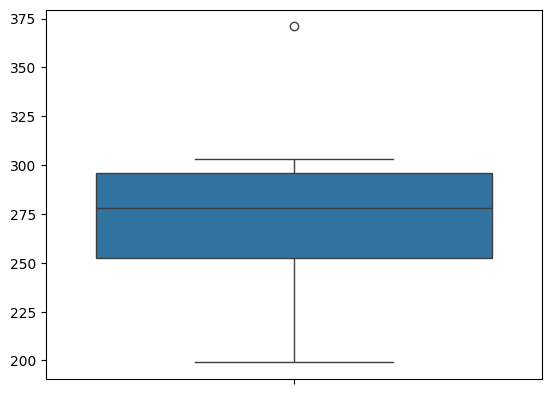

In [ ]:
import seaborn as sns
#Vẽ boxplot bằng thư viện seaborn
sns.boxplot(x)

In [26]:
#Thực hiện với bộ dữ liệu heart_2022_with_nans.csv
import pandas as pd
df = pd.read_csv("heart_2022_with_nans.csv")
df.shape

(445132, 40)

In [27]:
df.select_dtypes("float")

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,8.0,NaN,NaN,NaN
1,0.0,0.0,6.0,1.60,68.04,26.57
2,2.0,3.0,5.0,1.57,63.50,25.61
3,0.0,0.0,7.0,1.65,63.50,23.30
4,2.0,0.0,9.0,1.57,53.98,21.77
...,...,...,...,...,...,...
445127,0.0,3.0,6.0,1.65,69.85,25.63
445128,2.0,2.0,7.0,1.70,83.01,28.66
445129,30.0,30.0,5.0,1.70,49.90,17.23
445130,0.0,0.0,5.0,1.83,108.86,32.55


In [28]:
#Xử lý các giá trị khuyết thiếu
##Đếm các giá trị khuyết thiếu ở từng cột
df.isna().sum()/df.shape[0]

State                        0.000000
Sex                          0.000000
GeneralHealth                0.002691
PhysicalHealthDays           0.024548
MentalHealthDays             0.020369
LastCheckupTime              0.018664
PhysicalActivities           0.002455
SleepHours                   0.012250
RemovedTeeth                 0.025521
HadHeartAttack               0.006886
HadAngina                    0.009896
HadStroke                    0.003498
HadAsthma                    0.003983
HadSkinCancer                0.007061
HadCOPD                      0.004985
HadDepressiveDisorder        0.006317
HadKidneyDisease             0.004327
HadArthritis                 0.005915
HadDiabetes                  0.002442
DeafOrHardOfHearing          0.046384
BlindOrVisionDifficulty      0.048444
DifficultyConcentrating      0.054456
DifficultyWalking            0.053944
DifficultyDressingBathing    0.053726
DifficultyErrands            0.057637
SmokerStatus                 0.079666
ECigaretteUs

In [29]:
#Tìm các cột dữ liệu dạng số có chứa missing data
numeric_cols = df.select_dtypes("float", "int64").columns.tolist()

df[numeric_cols].isna().sum()/len(df)

#Điền các gía trị khuyết thiếu bằng median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

df[numeric_cols].isna().sum()/len(df)

PhysicalHealthDays    0.0
MentalHealthDays      0.0
SleepHours            0.0
HeightInMeters        0.0
WeightInKilograms     0.0
BMI                   0.0
dtype: float64

In [30]:
#Tìm các cột dữ liệu dạng categorical có chứa missing data
categorical_cols = df.select_dtypes("object").columns.tolist()

nan_cols = df[categorical_cols].loc[:, df[categorical_cols].isna().any()].columns.tolist()
#Cách 1: Điền missing data bằng giá trị xuất hiện nhiều nhất ở mỗi cột
for col in nan_cols:
    mode = df[col].mode()
    df[col].fillna(mode, inplace=True)

#Cách 2: Nhóm các giá trị missing lại và điền tên nhóm mới
for col in nan_cols:
    #mode = df[col].mode()
    df[col].fillna("Missing", inplace=True)

df[categorical_cols].isna().sum()/len(df)

State                        0.0
Sex                          0.0
GeneralHealth                0.0
LastCheckupTime              0.0
PhysicalActivities           0.0
RemovedTeeth                 0.0
HadHeartAttack               0.0
HadAngina                    0.0
HadStroke                    0.0
HadAsthma                    0.0
HadSkinCancer                0.0
HadCOPD                      0.0
HadDepressiveDisorder        0.0
HadKidneyDisease             0.0
HadArthritis                 0.0
HadDiabetes                  0.0
DeafOrHardOfHearing          0.0
BlindOrVisionDifficulty      0.0
DifficultyConcentrating      0.0
DifficultyWalking            0.0
DifficultyDressingBathing    0.0
DifficultyErrands            0.0
SmokerStatus                 0.0
ECigaretteUsage              0.0
ChestScan                    0.0
RaceEthnicityCategory        0.0
AgeCategory                  0.0
AlcoholDrinkers              0.0
HIVTesting                   0.0
FluVaxLast12                 0.0
PneumoVaxE

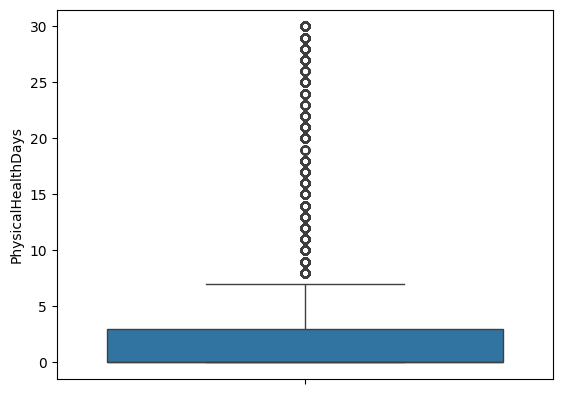

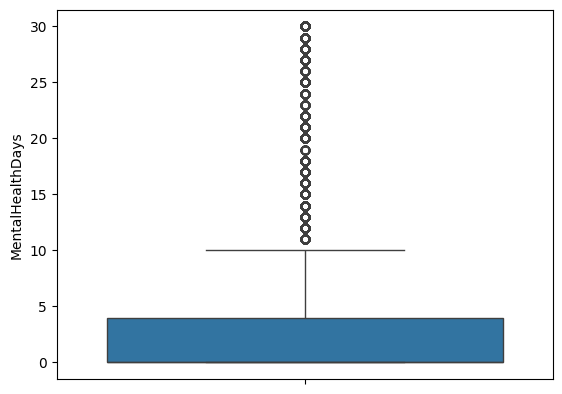

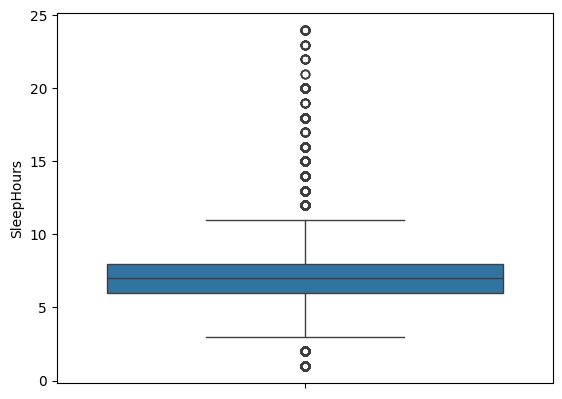

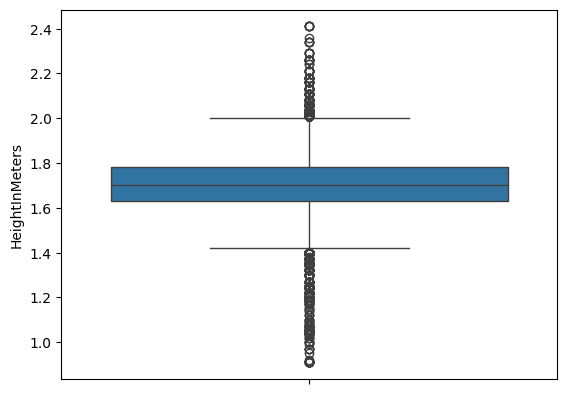

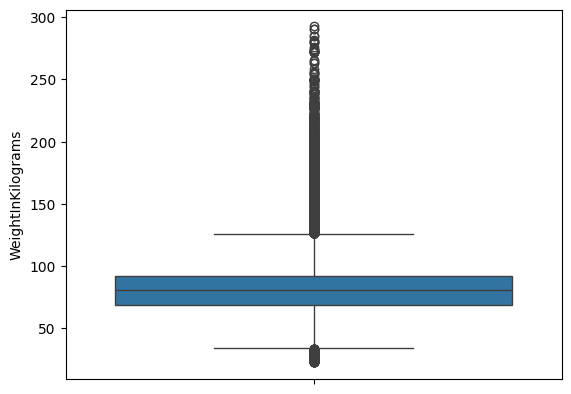

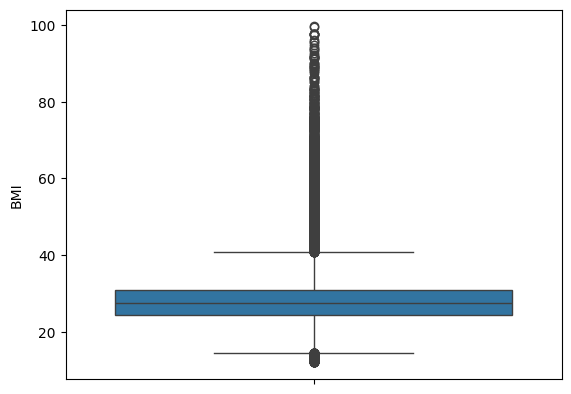

In [32]:
#Vẽ boxplot cho các cột dữ liệu dạng số
import matplotlib.pyplot as plt
import seaborn as sns
for col in numeric_cols:
    sns.boxplot(df[col])
    plt.show()

In [33]:
## Phát hiện các điểm dữ liệu outliers trong các cột dữ liệu dạng số sử dụng IQR
def detect_outliers(df):
    numeric_cols = df.select_dtypes("float", "int64").columns.tolist()
    outlier_indices = set()
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        min_whisker = Q1 - 1.5*IQR
        max_whisker = Q3 + 1.5*IQR
        outliers = df[(df[col]<min_whisker) | (df[col]>max_whisker)].index
        outlier_indices.update(outliers)
    return list(outlier_indices)

In [34]:
# Lấy index outliers
outlier_idx = detect_outliers(df)

# Lọc DataFrame không chứa outliers
df_no_outliers = df.drop(index=outlier_idx)

In [35]:
df_no_outliers.shape

(316453, 40)

In [17]:
import math

In [19]:
#Phát hiện ngoại lai sử dụng quy tắc 3 sigma
x= [199, 201, 236, 269, 271, 278, 283, 291, 301, 303, 371]

#Tính trung bình mẫu
x_ngang = sum(x)/len(x)

#Tính độ lệch chuẩn hiệu chỉnh
tong = [(xi-x_ngang)**2 for xi in x]
s = math.sqrt(1/(len(x)-1)*sum(tong))

#Phát hiện outlier sử dụng khoảng (x_ngang - 2s; x_ngang + 2s)
lower_bound = x_ngang - 2*s
upper_bound = x_ngang + 2*s
outliers = [xi for xi in x
            if ((xi < lower_bound)|(xi>upper_bound))]

outliers

[371]

### 3. Co giãn và chuẩn hoá dữ liệu

In [14]:
#Chuẩn hoá cực đại, cực tiểu (Nên sử dụng với bộ dữ liệu đã loại outlier)
for col in numeric_cols:
    min_values = df_no_outliers[col].min()
    max_values = df_no_outliers[col].max()
    df_no_outliers[col] = [(x-min_values)/(max_values-min_values) for x in df_no_outliers[col]]

df_no_outliers[numeric_cols]

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.000000,0.0,0.625,0.500000,0.507385,0.489773
1,0.000000,0.0,0.375,0.321429,0.369461,0.456818
2,0.285714,0.3,0.250,0.267857,0.320156,0.420455
3,0.000000,0.0,0.500,0.410714,0.320156,0.332955
4,0.285714,0.0,0.750,0.267857,0.216768,0.275000
...,...,...,...,...,...,...
445126,0.000000,0.0,0.625,0.732143,0.763575,0.631818
445127,0.000000,0.3,0.375,0.410714,0.389118,0.421212
445128,0.285714,0.2,0.500,0.500000,0.532037,0.535985
445130,0.000000,0.0,0.250,0.732143,0.812772,0.683333


#### 4. Phân tích thành phần chính (PCA)